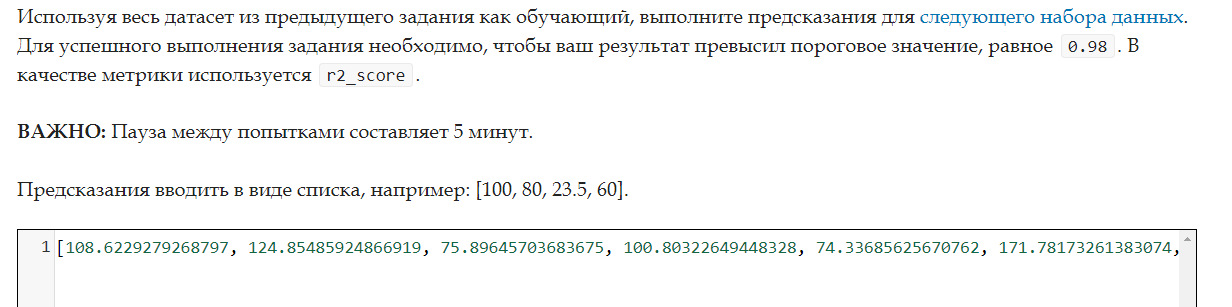

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

fish_train = pd.read_csv('fish_train.csv')
fish_reserved = pd.read_csv('fish_reserved.csv')

species_mapping = {species: idx for idx, species in enumerate(fish_train['Species'].unique())}
fish_train['Species'] = fish_train['Species'].map(species_mapping)
fish_reserved['Species'] = fish_reserved['Species'].map(species_mapping)

if 'Weight' in fish_reserved.columns:
    fish_reserved.drop('Weight', axis=1, inplace=True)

X_train = fish_train.drop('Weight', axis=1)
y_train = fish_train['Weight']
X_reserved = fish_reserved

# Применение PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_reserved_poly = poly.transform(X_reserved)

# Обучение модели с регуляризацией
model = Ridge(alpha=0.1)
model.fit(X_train_poly, y_train)

# Выполнение предсказаний на наборе данных fish_reserved
predictions = model.predict(X_reserved_poly)
print(predictions.tolist())

# Вычисление R2 для обучающего набора
y_train_pred = model.predict(X_train_poly)
r2_train = r2_score(y_train, y_train_pred)
print("R2 Score on Training Set:", r2_train)


[109.62827918804055, 131.99439739629838, 83.42120929123143, 126.05672348646135, 97.02769386981186, 175.86510963629212, 34.680193997275865, 489.76889968230194, 365.90086587236533, 91.23527983209738, 2082.969591779958, 176.90234176699983, 618.762825281334, 1147.3249185299248, 27.493180693109252, 661.9652166217313, 98.33944662938688, 791.7093141753323, 1550.8277633458822, 93.51862654746606, 672.3575968803818, 197.92778366009975, 79.50144115074022, 173.52474898229798, 318.86102088747816, 591.4658962518772, 344.5878414249785, 31.2744050585718, 49.706064018453844, 27.107249341290526, 938.3906848750523, 551.0730949291358, 578.2467949618333, 164.20331058267425, 67.40972102479668, 60.76623206289173, 132.76517484902092, 943.7633912189378, 693.6850297888489, 140.58797627865374]
R2 Score on Training Set: 0.9929952813559442
